<a href="https://colab.research.google.com/github/E-SaiAnurath/ADM_final_project/blob/main/Stroke_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Stroke Prediction using Machine Learning

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Preprocessing & model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# SMOTE for imbalance
from imblearn.over_sampling import SMOTE


In [ ]:
# Load the CSV file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')  # Change path if needed
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# DATA PREPROCESSING

In [ ]:
# Drop ID column
df = df.drop(columns=['id'])

# Fill missing values in BMI with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


<ipython-input-5-6d8215c5b5f1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [ ]:
# Split features and label
X = df.drop(columns=['stroke'])
y = df['stroke']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Check new distribution
print(y_train_smote.value_counts())


stroke
0    3889
1    3889
Name: count, dtype: int64


# TRAINING DATA USING Machine Learning Models

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



--- Logistic Regression ---
Accuracy: 0.7583170254403131
Precision: 0.1444043321299639
Recall: 0.8
F1 Score: 0.24464831804281345
Confusion Matrix:
 [[735 237]
 [ 10  40]]

--- Random Forest ---
Accuracy: 0.9246575342465754
Precision: 0.18604651162790697
Recall: 0.16
F1 Score: 0.17204301075268819
Confusion Matrix:
 [[937  35]
 [ 42   8]]

--- Decision Tree ---
Accuracy: 0.8904109589041096
Precision: 0.13095238095238096
Recall: 0.22
F1 Score: 0.16417910447761194
Confusion Matrix:
 [[899  73]
 [ 39  11]]

--- Support Vector Machine ---
Accuracy: 0.7700587084148728
Precision: 0.11934156378600823
Recall: 0.58
F1 Score: 0.19795221843003413
Confusion Matrix:
 [[758 214]
 [ 21  29]]


# Exploratory Data Analysis (EDA) — Stroke vs Non-Stroke Insights

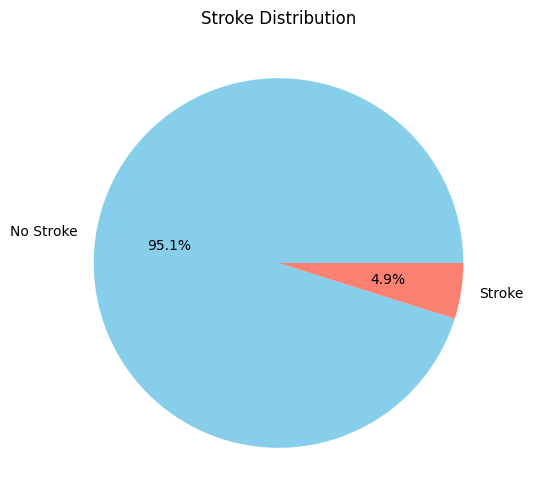

In [ ]:
import matplotlib.pyplot as plt

stroke_counts = df['stroke'].value_counts()
labels = ['No Stroke', 'Stroke']

[ ]


plt.figure(figsize=(6,6))
plt.pie(stroke_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Stroke Distribution')
plt.show()


Shape: (5110, 12)

Data Types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<ipython-input-9-265fba12de90>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stroke', palette='Set2')


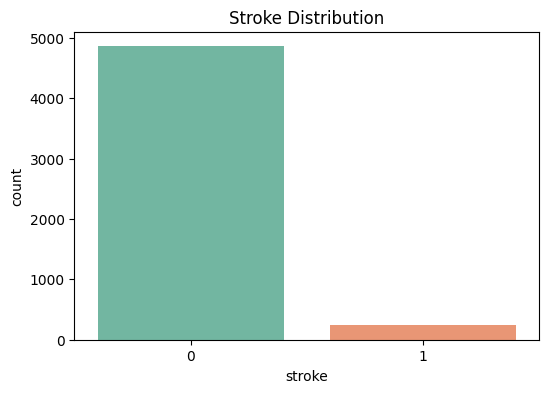

<ipython-input-9-265fba12de90>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='age', palette='coolwarm')


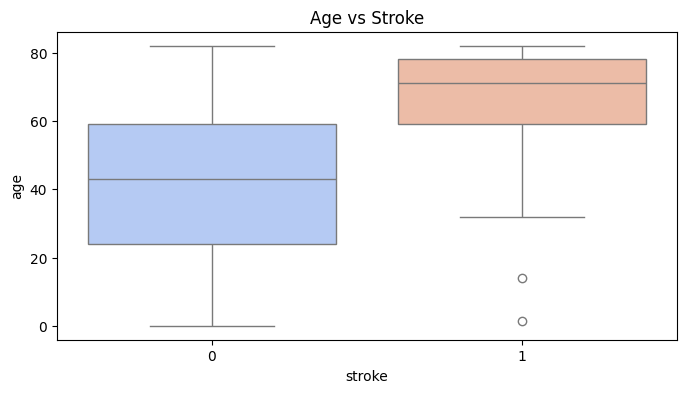

<ipython-input-9-265fba12de90>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=df, palette='Set3')


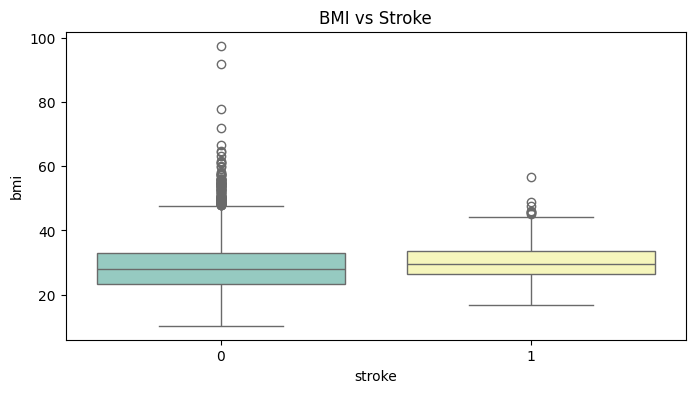

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Distribution of Stroke
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='stroke', palette='Set2')
plt.title("Stroke Distribution")
plt.show()





# Age vs Stroke
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='stroke', y='age', palette='coolwarm')
plt.title("Age vs Stroke")
plt.show()




# BMI vs Stroke
plt.figure(figsize=(8,4))
sns.boxplot(x='stroke', y='bmi', data=df, palette='Set3')
plt.title("BMI vs Stroke")
plt.show()



# Age Distribution Graphs

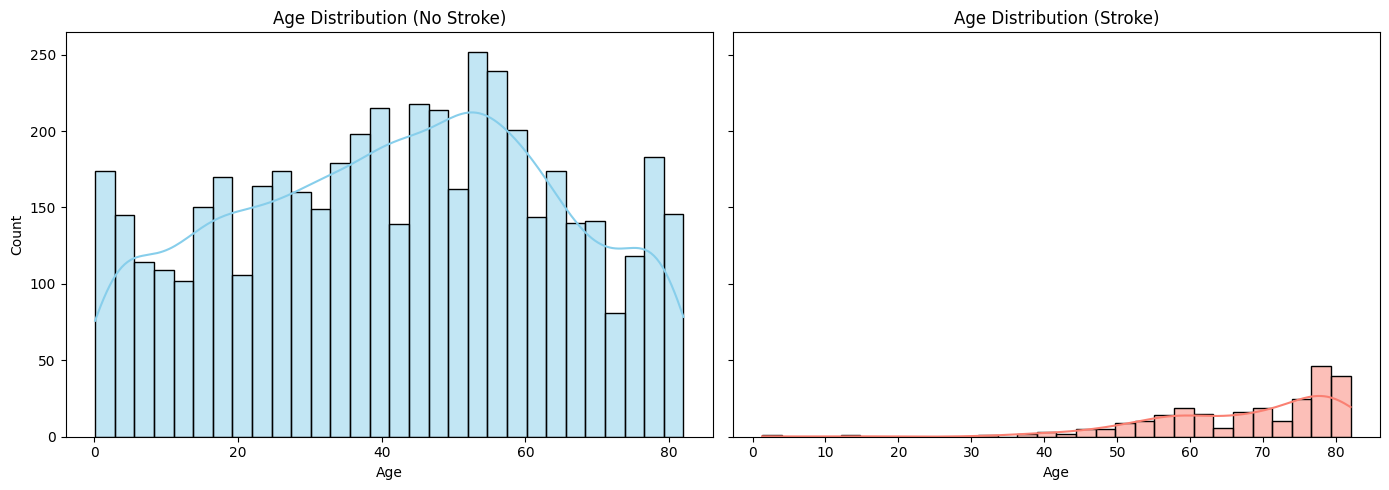

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate datasets
stroke_yes = df[df['stroke'] == 1]
stroke_no = df[df['stroke'] == 0]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Age distribution for No Stroke
sns.histplot(data=stroke_no, x='age', bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution (No Stroke)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Age distribution for Stroke
sns.histplot(data=stroke_yes, x='age', bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Age Distribution (Stroke)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



# Exploratory Data Analysis (EDA) — Glucose Level Distribution(NO STROKE VS STROKE)

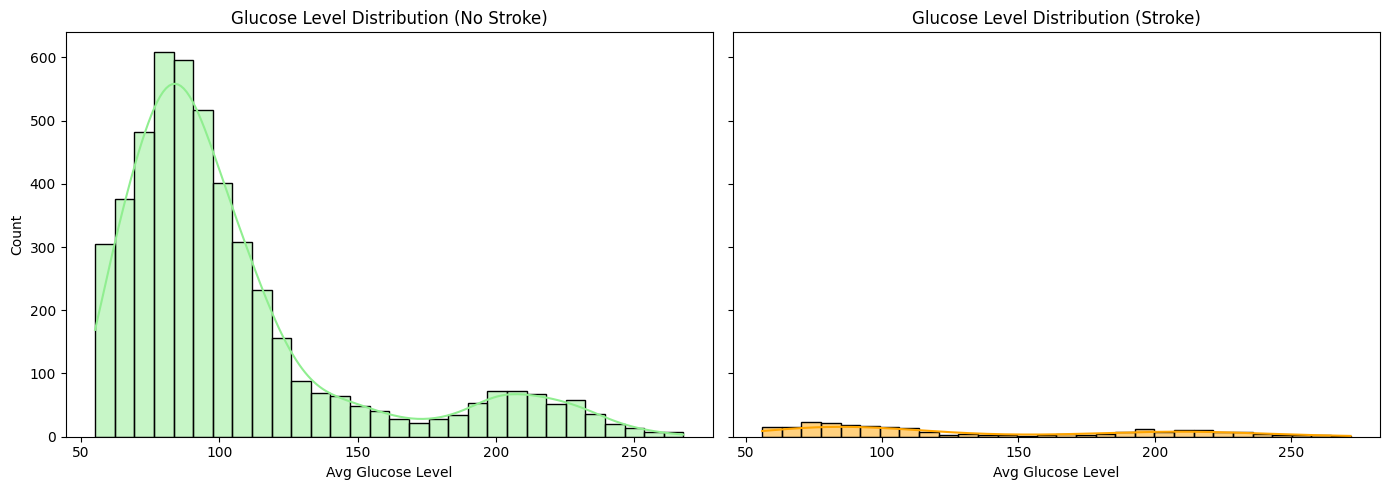

In [ ]:
# Separate datasets
stroke_yes = df[df['stroke'] == 1]
stroke_no = df[df['stroke'] == 0]

# Plotting Glucose levels
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(data=stroke_no, x='avg_glucose_level', bins=30, kde=True, color='lightgreen', ax=axes[0])
axes[0].set_title('Glucose Level Distribution (No Stroke)')
axes[0].set_xlabel('Avg Glucose Level')
axes[0].set_ylabel('Count')

sns.histplot(data=stroke_yes, x='avg_glucose_level', bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Glucose Level Distribution (Stroke)')
axes[1].set_xlabel('Avg Glucose Level')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# BMI Distrubution(NO STROKE VS STROKE)

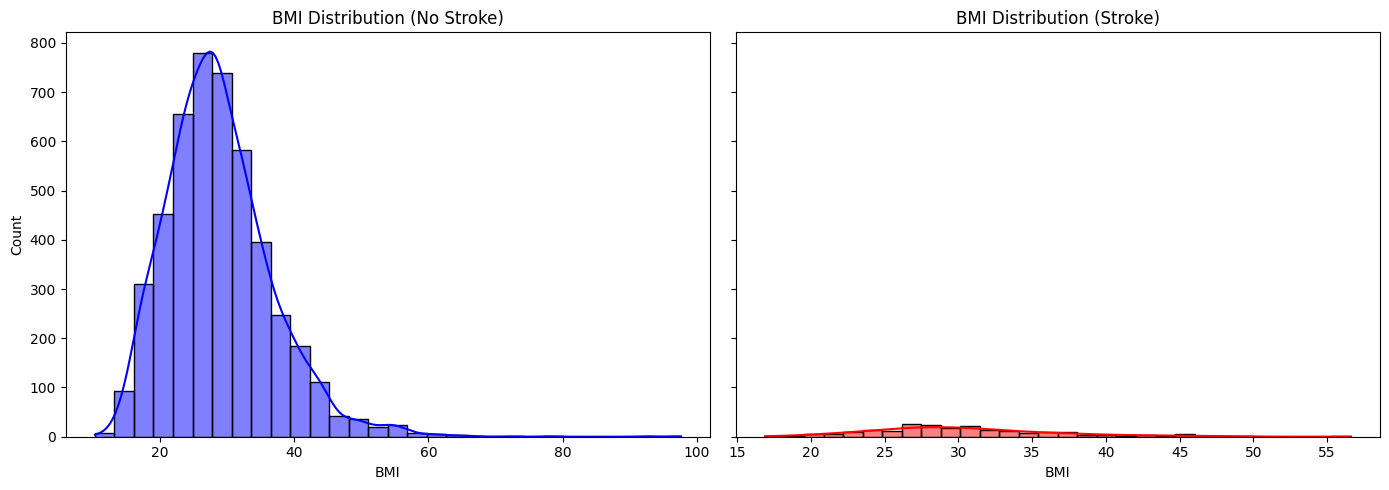

In [ ]:
# Plotting BMI
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(data=stroke_no, x='bmi', bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('BMI Distribution (No Stroke)')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Count')

sns.histplot(data=stroke_yes, x='bmi', bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title('BMI Distribution (Stroke)')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


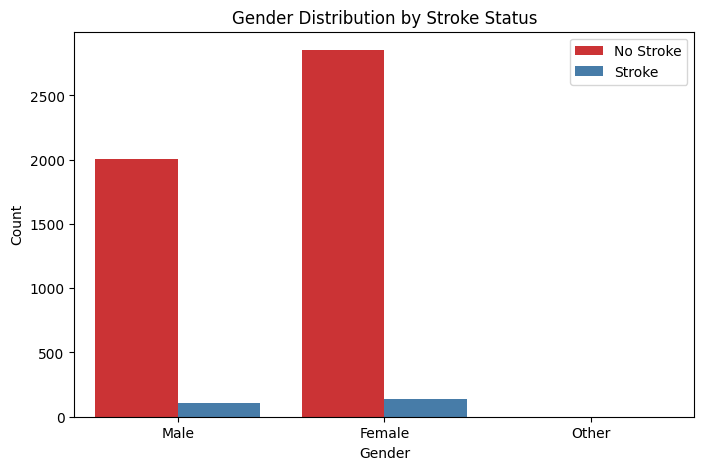

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='gender', hue='stroke', palette='Set1')
plt.title("Gender Distribution by Stroke Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(['No Stroke', 'Stroke'])
plt.show()


# Smoking Status vs Stroke

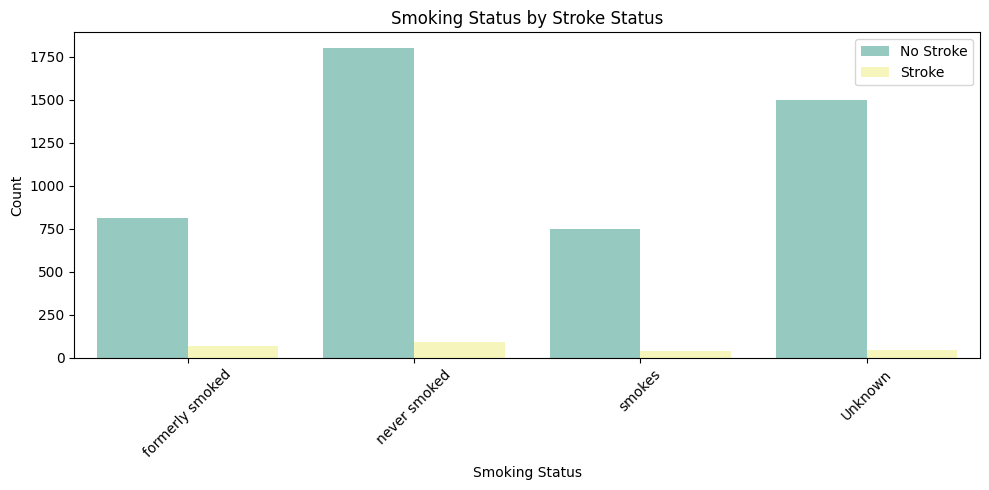

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='Set3')
plt.title("Smoking Status by Stroke Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Work Type vs Stroke

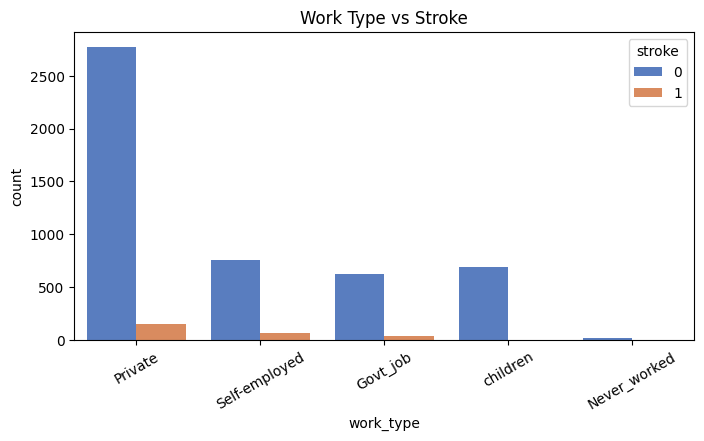

In [ ]:
# Work Type vs Stroke
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='work_type', hue='stroke', palette='muted')
plt.title("Work Type vs Stroke")
plt.xticks(rotation=30)
plt.show()

# Hypertension vs Stroke

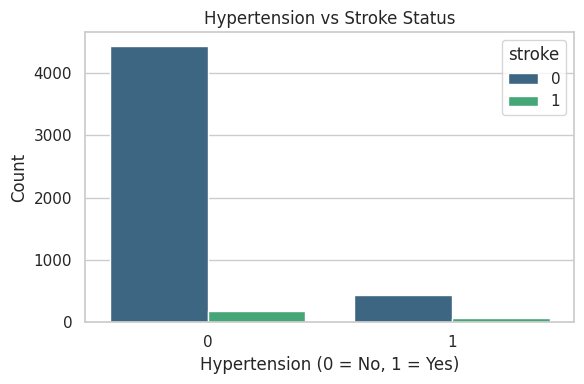

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Create countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hypertension', hue='stroke', palette='viridis')

# Set title and labels
plt.title("Hypertension vs Stroke Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Display the plot
plt.tight_layout()
plt.show()


# Heart Disease vs Stroke

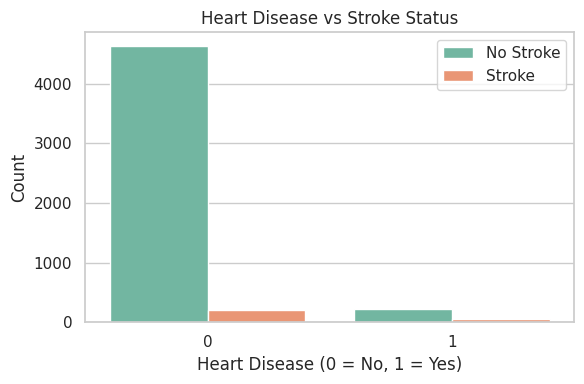

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='heart_disease', hue='stroke', palette='Set2')
plt.title("Heart Disease vs Stroke Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()


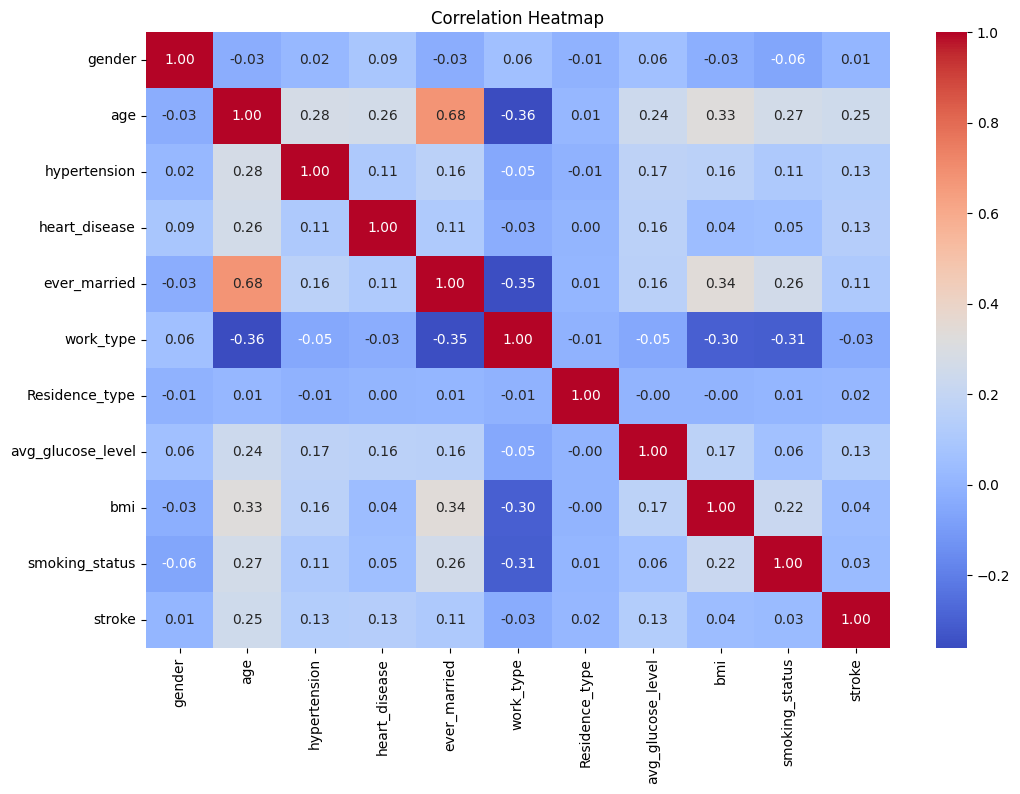

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


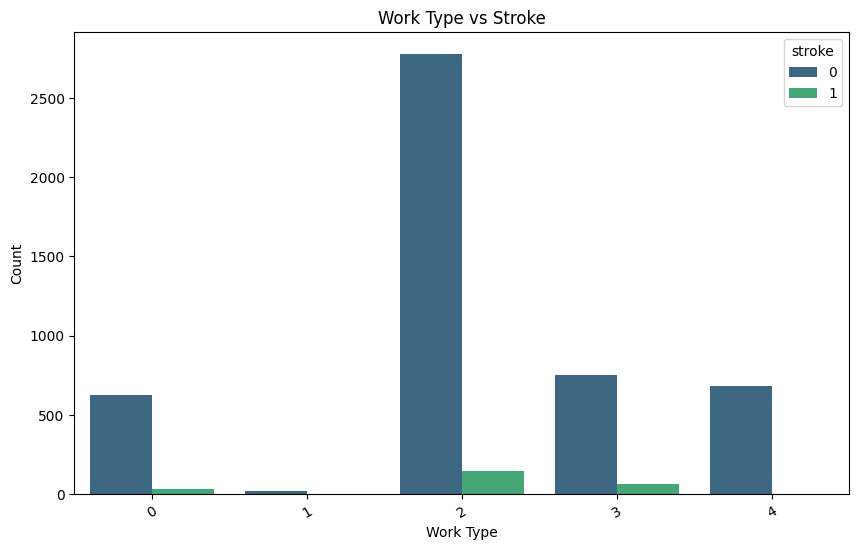

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='work_type', hue='stroke', palette='viridis')
plt.title('Work Type vs Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


<ipython-input-12-651b2273ca5a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='magma')


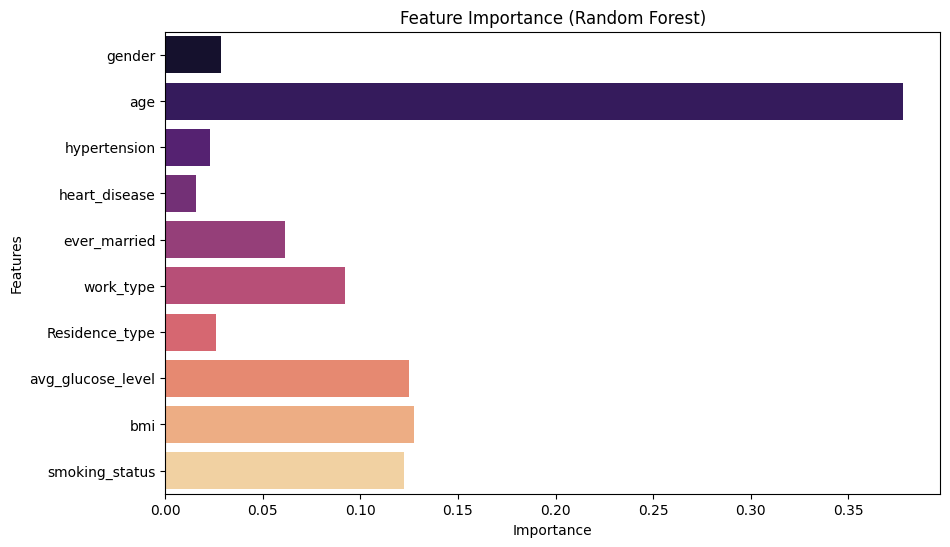

In [ ]:
# Fit Random Forest again (if not already done)
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

# Get importance
importances = rf.feature_importances_
feature_names = df.drop('stroke', axis=1).columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette='magma')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# VISUALIZATION OF THE DATA SET

# DISPLAYING THE CONFUSSION MATRIX

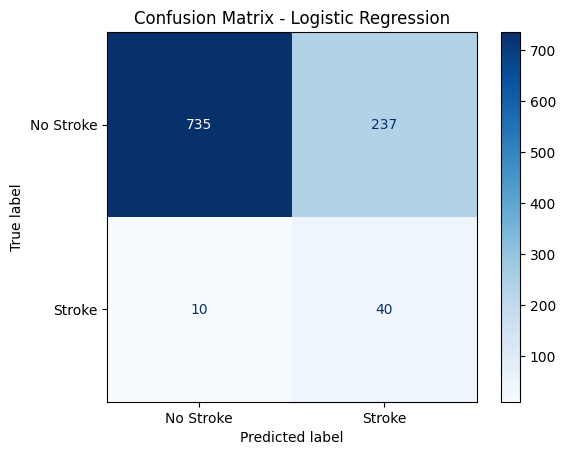

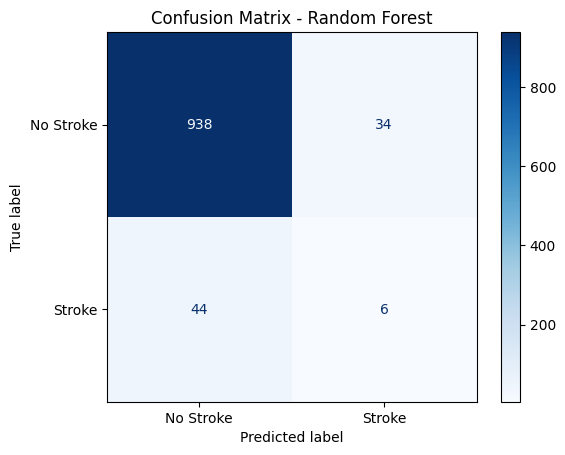

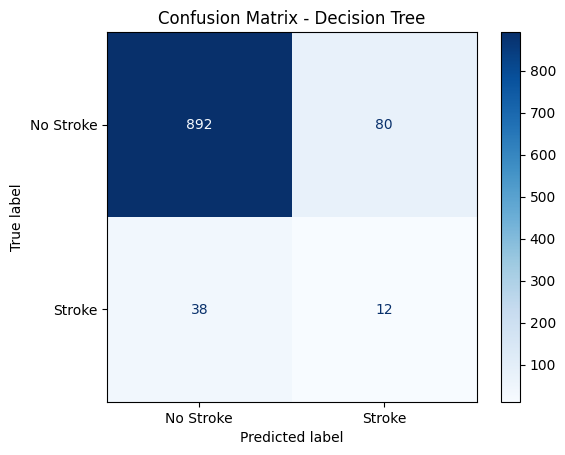

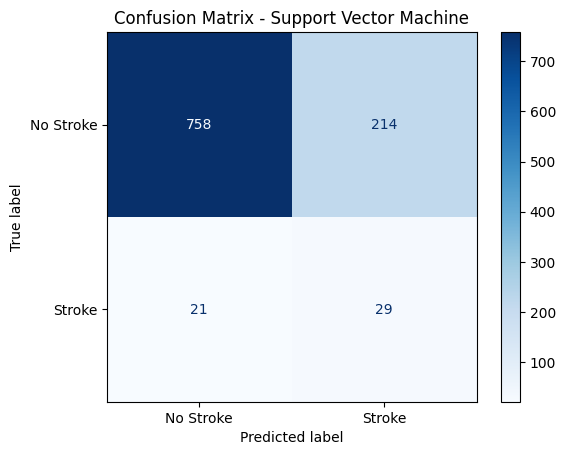

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize confusion matrices for all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


# Results and Analysis

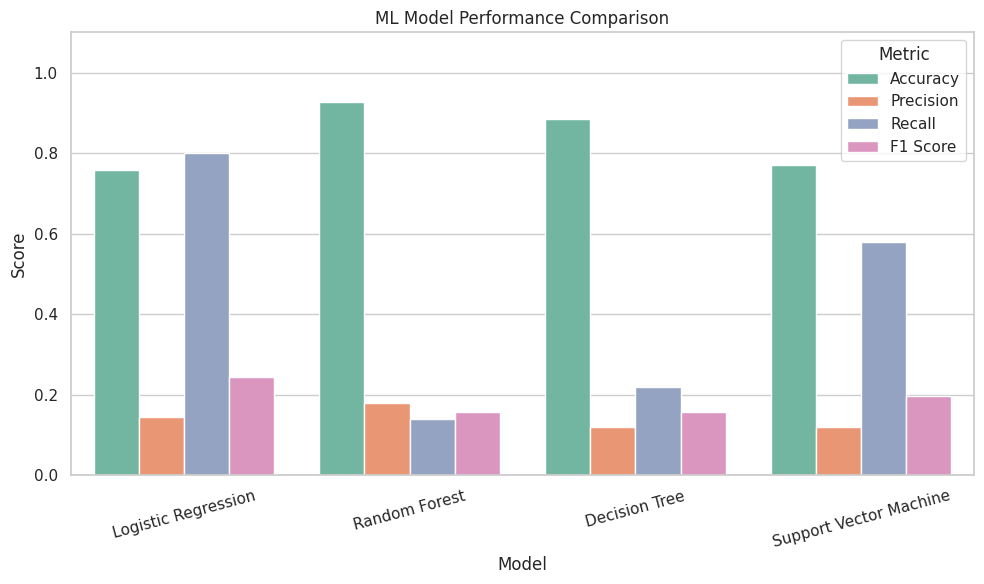

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a list to store the scores
model_scores = []

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    model_scores.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Convert to DataFrame
scores_df = pd.DataFrame(model_scores)

# Melt the DataFrame for seaborn
scores_melted = scores_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the comparison
plt.figure(figsize=(10,6))
sns.barplot(data=scores_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('ML Model Performance Comparison')
plt.ylim(0, 1.1)
plt.legend(title='Metric')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
